In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math

# reading csv files
#suffle data for randomness
df =  pd.read_csv('D:/HomeWork/Pattern/inputs/P5/blood_test.txt', sep=",")
df.loc[df['drinks'] >= 5, 'class'] = 1
df.loc[df['drinks'] < 5, 'class'] = 2
data = df.sample(frac=1)

trainData = data[data['selector'] == 1]
testData = data[data['selector'] == 2]



tt = testData.iloc[:, 0:5].values
testClassArray = testData.iloc[:, 7].values
testData.head(200)

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector,class
86,88,47,33,26,29,2.0,2,2.0
163,92,76,31,28,41,6.0,2,1.0
77,96,72,28,19,30,2.0,2,2.0
69,90,63,16,21,14,1.0,2,2.0
129,90,74,19,14,22,4.0,2,2.0
...,...,...,...,...,...,...,...,...
285,94,117,77,56,52,4.0,2,2.0
99,92,75,26,26,24,3.0,2,2.0
43,86,84,18,14,16,0.5,2,2.0
305,94,71,25,26,31,5.0,2,1.0


In [2]:
def getMeanAndCov(m , trainDatas):
    
#Get m data and work on them
    trainingData = trainDatas[:m]
    
    addictedData = trainingData[trainingData['drinks'] >= 5]
    disinclinedData = trainingData[trainingData['drinks'] < 5]
    addictedData.pop('drinks')
    disinclinedData.pop('drinks')

#insert data in arrays
    x_addictedDataList = addictedData.iloc[:, :].values
    x_disinclinedDataList = disinclinedData.iloc[:, :].values
    
#Take average of each feature
    column_sums_addicted = x_addictedDataList.sum(axis=0)
    mean_addicted = [column_addicted / len(x_addictedDataList) for column_addicted in column_sums_addicted]

#calculate cov of features

    centered_data_matrix_addicted = x_addictedDataList - mean_addicted
    cov_addicted = np.matmul(centered_data_matrix_addicted.T , centered_data_matrix_addicted) / len(x_addictedDataList)

#     print('Mean of addicted class for 10 samples is : \n', mean_addicted)
#     print('Cov of addicted class for 10 samples is : \n' , cov_addicted)

#     print('\n \n ------------------------------------------------- \n \n')
# # ------------------------------------------------------------------


#Take average of each feature
    column_sums_disinclined = x_disinclinedDataList.sum(axis=0)
    mean_disinclined = [column_disinclined / len(x_disinclinedDataList) for column_disinclined in column_sums_disinclined]

#calculate cov of features

    centered_data_matrix_disinclined = x_disinclinedDataList - mean_disinclined
    cov_disinclined = np.matmul(centered_data_matrix_disinclined.T , centered_data_matrix_disinclined) / len(x_disinclinedDataList)

#     print('Mean of disinclined class for 10 samples is : \n', mean_disinclined)
#     print('Cov of disinclined class for 10 samples is : \n' , cov_disinclined)
    
    
    prob_addicted = len(x_addictedDataList) / (len(x_addictedDataList) +  len(x_disinclinedDataList))
    prob_disinclined = len(x_disinclinedDataList) / (len(x_addictedDataList) +  len(x_disinclinedDataList))
    
    
    return mean_addicted , cov_addicted , prob_addicted , mean_disinclined , cov_disinclined, prob_disinclined , x_addictedDataList , x_disinclinedDataList

In [3]:
def calculate_classifier_value(x, mean, covariance , prob):
    x_m = x - mean
    first_seg = -(np.matmul( np.matmul(x_m , np.linalg.inv(covariance)) , (x_m).T) ) / 2
    second_seg = -math.log2(np.linalg.det(covariance)) + math.log2(prob)
    
    return first_seg + second_seg

In [116]:
def calculate_classifier_value_with_error(x, mean, covariance , prob , error):
    x_m = x - mean
    first_seg = -(np.matmul( np.matmul(x_m , np.linalg.inv(covariance)) , (x_m).T) ) / 2
    second_seg = -math.log2(np.linalg.det(covariance)) + math.log2(prob) + math.log2(error)
    
    return first_seg + second_seg

In [1]:
########################################

In [ ]:
#Question 1 and Question 2

In [4]:
#work on 10 data

trainDatas = trainData.copy()
trainDatas.pop('selector')
trainDatas.pop('class')

#Addicted
#mean and cov and probability

#Disinclined
#mean and cov and probability

mean_addicted , cov_addicted , prob_addicted , mean_disinclined , cov_disinclined , prob_disinclined, x_addictedDataList , x_disinclinedDataList = getMeanAndCov(10 , trainDatas)

calculated_data = np.zeros(shape=(len(tt)))

for i in range(len(tt)):
    test = tt[i]

# prob = prob_disinclined / prob_addicted

    calculate_classifier_value_addicted = calculate_classifier_value(test , mean_addicted , cov_addicted , prob_addicted)
    calculate_classifier_value__disinclined = calculate_classifier_value(test , mean_disinclined , cov_disinclined , prob_disinclined)
    
    if calculate_classifier_value_addicted - calculate_classifier_value__disinclined >= 0 :
        calculated_data[i] = 1
    else:
        calculated_data[i] = 2
        
counter = 0
for i in range(len(tt)):
    if testClassArray[i] != calculated_data[i]:
        counter = counter + 1
        print('Test data with class: ', testClassArray[i],' predicted as class : ' , calculated_data[i] , counter)



Test data with class:  2.0  predicted as class :  1.0 1
Test data with class:  2.0  predicted as class :  1.0 2
Test data with class:  2.0  predicted as class :  1.0 3
Test data with class:  2.0  predicted as class :  1.0 4
Test data with class:  2.0  predicted as class :  1.0 5
Test data with class:  2.0  predicted as class :  1.0 6
Test data with class:  2.0  predicted as class :  1.0 7
Test data with class:  2.0  predicted as class :  1.0 8
Test data with class:  2.0  predicted as class :  1.0 9
Test data with class:  2.0  predicted as class :  1.0 10
Test data with class:  1.0  predicted as class :  2.0 11
Test data with class:  2.0  predicted as class :  1.0 12
Test data with class:  2.0  predicted as class :  1.0 13
Test data with class:  2.0  predicted as class :  1.0 14
Test data with class:  1.0  predicted as class :  2.0 15
Test data with class:  2.0  predicted as class :  1.0 16
Test data with class:  2.0  predicted as class :  1.0 17
Test data with class:  2.0  predicted as

In [5]:
#work on 50 data

trainDatas = trainData.copy()
trainDatas.pop('selector')
trainDatas.pop('class')

#Addicted
#mean and cov and probability

#Disinclined
#mean and cov and probability

mean_addicted , cov_addicted , prob_addicted , mean_disinclined , cov_disinclined , prob_disinclined, x_addictedDataList , x_disinclinedDataList = getMeanAndCov(50 , trainDatas)

calculated_data = np.zeros(shape=(len(tt)))

for i in range(len(tt)):
    test = tt[i]

# prob = prob_disinclined / prob_addicted

    calculate_classifier_value_addicted = calculate_classifier_value(test , mean_addicted , cov_addicted , prob_addicted)
    calculate_classifier_value__disinclined = calculate_classifier_value(test , mean_disinclined , cov_disinclined , prob_disinclined)
    
    if calculate_classifier_value_addicted - calculate_classifier_value__disinclined >= 0 :
        calculated_data[i] = 1
    else:
        calculated_data[i] = 2
        
counter = 0
for i in range(len(tt)):
    if testClassArray[i] != calculated_data[i]:
        counter = counter + 1
        print('Test data with class: ', testClassArray[i],' predicted as class : ' , calculated_data[i] , counter)



Test data with class:  1.0  predicted as class :  2.0 1
Test data with class:  2.0  predicted as class :  1.0 2
Test data with class:  2.0  predicted as class :  1.0 3
Test data with class:  2.0  predicted as class :  1.0 4
Test data with class:  1.0  predicted as class :  2.0 5
Test data with class:  1.0  predicted as class :  2.0 6
Test data with class:  1.0  predicted as class :  2.0 7
Test data with class:  2.0  predicted as class :  1.0 8
Test data with class:  1.0  predicted as class :  2.0 9
Test data with class:  1.0  predicted as class :  2.0 10
Test data with class:  1.0  predicted as class :  2.0 11
Test data with class:  1.0  predicted as class :  2.0 12
Test data with class:  1.0  predicted as class :  2.0 13
Test data with class:  2.0  predicted as class :  1.0 14
Test data with class:  1.0  predicted as class :  2.0 15
Test data with class:  1.0  predicted as class :  2.0 16
Test data with class:  2.0  predicted as class :  1.0 17
Test data with class:  2.0  predicted as

In [6]:
#work on 100 data

trainDatas = trainData.copy()
trainDatas.pop('selector')
trainDatas.pop('class')

#Addicted
#mean and cov and probability

#Disinclined
#mean and cov and probability
mean_addicted , cov_addicted , prob_addicted , mean_disinclined , cov_disinclined , prob_disinclined, x_addictedDataList , x_disinclinedDataList = getMeanAndCov(100 , trainDatas)

calculated_data = np.zeros(shape=(len(tt)))

for i in range(len(tt)):
    test = tt[i]

# prob = prob_disinclined / prob_addicted

    calculate_classifier_value_addicted = calculate_classifier_value(test , mean_addicted , cov_addicted , prob_addicted)
    calculate_classifier_value__disinclined = calculate_classifier_value(test , mean_disinclined , cov_disinclined , prob_disinclined)
    
    if calculate_classifier_value_addicted - calculate_classifier_value__disinclined >= 0 :
        calculated_data[i] = 1
    else:
        calculated_data[i] = 2
        
counter = 0
for i in range(len(tt)):
    if testClassArray[i] != calculated_data[i]:
        counter = counter + 1
        print('Test data with class: ', testClassArray[i],' predicted as class : ' , calculated_data[i] , counter)



Test data with class:  1.0  predicted as class :  2.0 1
Test data with class:  2.0  predicted as class :  1.0 2
Test data with class:  2.0  predicted as class :  1.0 3
Test data with class:  2.0  predicted as class :  1.0 4
Test data with class:  1.0  predicted as class :  2.0 5
Test data with class:  2.0  predicted as class :  1.0 6
Test data with class:  1.0  predicted as class :  2.0 7
Test data with class:  1.0  predicted as class :  2.0 8
Test data with class:  1.0  predicted as class :  2.0 9
Test data with class:  1.0  predicted as class :  2.0 10
Test data with class:  1.0  predicted as class :  2.0 11
Test data with class:  1.0  predicted as class :  2.0 12
Test data with class:  1.0  predicted as class :  2.0 13
Test data with class:  2.0  predicted as class :  1.0 14
Test data with class:  1.0  predicted as class :  2.0 15
Test data with class:  1.0  predicted as class :  2.0 16
Test data with class:  2.0  predicted as class :  1.0 17
Test data with class:  1.0  predicted as

In [2]:
####################################

In [3]:
#Question 4
#trial and error for All Features and calculate accuracy

In [117]:
#work on 100 data
#F1 and F2

trainDatas = trainData.copy()
trainDatas.pop('selector')
trainDatas.pop('class')
trainDatas.pop('sgpt')
trainDatas.pop('sgot')
trainDatas.pop('gammagt')

mean_addicted , cov_addicted , prob_addicted , mean_disinclined , cov_disinclined , prob_disinclined , z , x = getMeanAndCov(100 , trainDatas)

mm = testData[['mcv' , 'alkphos']].values

calculated_data = np.zeros(shape=(len(mm)))

for i in range(len(mm)):
    test = mm[i]

# prob = prob_disinclined / prob_addicted

    calculate_classifier_value_addicted = calculate_classifier_value(test , mean_addicted , cov_addicted , prob_addicted)
    calculate_classifier_value__disinclined = calculate_classifier_value(test , mean_disinclined , cov_disinclined , prob_disinclined)
    
    if calculate_classifier_value_addicted - calculate_classifier_value__disinclined >= 0 :
        calculated_data[i] = 1
    else:
        calculated_data[i] = 2
        
counter = 0
for i in range(len(mm)):
    if testClassArray[i] != calculated_data[i]:
        counter = counter + 1
#         print('Test data with class: ', testClassArray[i],' predicted as class : ' , calculated_data[i] , counter)

accuracy = ((len(mm) - counter)/len(mm)) * 100

print(accuracy)


72.5


In [118]:
#work on 100 data
#F1 and F3

trainDatas = trainData.copy()
trainDatas.pop('selector')
trainDatas.pop('class')
trainDatas.pop('alkphos')
trainDatas.pop('sgot')
trainDatas.pop('gammagt')

mean_addicted , cov_addicted , prob_addicted , mean_disinclined , cov_disinclined , prob_disinclined , x_addictedDataList , x_disinclinedDataList = getMeanAndCov(100 , trainDatas)

mm = testData[['mcv' , 'sgpt']].values

calculated_data = np.zeros(shape=(len(mm)))

for i in range(len(mm)):
    test = mm[i]

# prob = prob_disinclined / prob_addicted

    calculate_classifier_value_addicted = calculate_classifier_value(test , mean_addicted , cov_addicted , prob_addicted)
    calculate_classifier_value__disinclined = calculate_classifier_value(test , mean_disinclined , cov_disinclined , prob_disinclined)
    
    if calculate_classifier_value_addicted - calculate_classifier_value__disinclined >= 0 :
        calculated_data[i] = 1
    else:
        calculated_data[i] = 2
        
counter = 0
for i in range(len(mm)):
    if testClassArray[i] != calculated_data[i]:
        counter = counter + 1
#         print('Test data with class: ', testClassArray[i],' predicted as class : ' , calculated_data[i] , counter)

accuracy = ((len(mm) - counter)/len(mm)) * 100

print(accuracy)



72.0


In [119]:
#work on 100 data
#F1 and F4

trainDatas = trainData.copy()
trainDatas.pop('selector')
trainDatas.pop('class')
trainDatas.pop('alkphos')
trainDatas.pop('sgpt')
trainDatas.pop('gammagt')

mean_addicted , cov_addicted , prob_addicted , mean_disinclined , cov_disinclined , prob_disinclined , x_addictedDataList , x_disinclinedDataList = getMeanAndCov(100 , trainDatas)

mm = testData[['mcv' , 'sgot']].values

calculated_data = np.zeros(shape=(len(mm)))

for i in range(len(mm)):
    test = mm[i]

# prob = prob_disinclined / prob_addicted

    calculate_classifier_value_addicted = calculate_classifier_value(test , mean_addicted , cov_addicted , prob_addicted)
    calculate_classifier_value__disinclined = calculate_classifier_value(test , mean_disinclined , cov_disinclined , prob_disinclined)
    
    if calculate_classifier_value_addicted - calculate_classifier_value__disinclined >= 0 :
        calculated_data[i] = 1
    else:
        calculated_data[i] = 2
        
counter = 0
for i in range(len(mm)):
    if testClassArray[i] != calculated_data[i]:
        counter = counter + 1
#         print('Test data with class: ', testClassArray[i],' predicted as class : ' , calculated_data[i] , counter)

accuracy = ((len(mm) - counter)/len(mm)) * 100

print(accuracy)



72.5


In [120]:
#work on 100 data
#F1 and F5

trainDatas = trainData.copy()
trainDatas.pop('selector')
trainDatas.pop('class')
trainDatas.pop('alkphos')
trainDatas.pop('sgpt')
trainDatas.pop('sgot')

mean_addicted , cov_addicted , prob_addicted , mean_disinclined , cov_disinclined , prob_disinclined , x_addictedDataList , x_disinclinedDataList = getMeanAndCov(100 , trainDatas)

mm = testData[['mcv' , 'gammagt']].values

calculated_data = np.zeros(shape=(len(mm)))

for i in range(len(mm)):
    test = mm[i]

# prob = prob_disinclined / prob_addicted

    calculate_classifier_value_addicted = calculate_classifier_value(test , mean_addicted , cov_addicted , prob_addicted)
    calculate_classifier_value__disinclined = calculate_classifier_value(test , mean_disinclined , cov_disinclined , prob_disinclined)
    
    if calculate_classifier_value_addicted - calculate_classifier_value__disinclined >= 0 :
        calculated_data[i] = 1
    else:
        calculated_data[i] = 2
        
counter = 0
for i in range(len(mm)):
    if testClassArray[i] != calculated_data[i]:
        counter = counter + 1
#         print('Test data with class: ', testClassArray[i],' predicted as class : ' , calculated_data[i] , counter)

accuracy = ((len(mm) - counter)/len(mm)) * 100

print(accuracy)



74.5


In [121]:
#work on 100 data
#F2 and F3

trainDatas = trainData.copy()
trainDatas.pop('selector')
trainDatas.pop('class')
trainDatas.pop('mcv')
trainDatas.pop('gammagt')
trainDatas.pop('sgot')

mean_addicted , cov_addicted , prob_addicted , mean_disinclined , cov_disinclined , prob_disinclined , x_addictedDataList , x_disinclinedDataList = getMeanAndCov(100 , trainDatas)

mm = testData[['alkphos' , 'sgpt']].values

calculated_data = np.zeros(shape=(len(mm)))

for i in range(len(mm)):
    test = mm[i]

# prob = prob_disinclined / prob_addicted

    calculate_classifier_value_addicted = calculate_classifier_value(test , mean_addicted , cov_addicted , prob_addicted)
    calculate_classifier_value__disinclined = calculate_classifier_value(test , mean_disinclined , cov_disinclined , prob_disinclined)
    
    if calculate_classifier_value_addicted - calculate_classifier_value__disinclined >= 0 :
        calculated_data[i] = 1
    else:
        calculated_data[i] = 2
        
counter = 0
for i in range(len(mm)):
    if testClassArray[i] != calculated_data[i]:
        counter = counter + 1
#         print('Test data with class: ', testClassArray[i],' predicted as class : ' , calculated_data[i] , counter)

accuracy = ((len(mm) - counter)/len(mm)) * 100

print(accuracy)



71.5


In [122]:
#work on 100 data
#F2 and F4

trainDatas = trainData.copy()
trainDatas.pop('selector')
trainDatas.pop('class')
trainDatas.pop('mcv')
trainDatas.pop('gammagt')
trainDatas.pop('sgpt')

mean_addicted , cov_addicted , prob_addicted , mean_disinclined , cov_disinclined , prob_disinclined , x_addictedDataList , x_disinclinedDataList = getMeanAndCov(100 , trainDatas)

mm = testData[['alkphos' , 'sgot']].values

calculated_data = np.zeros(shape=(len(mm)))

for i in range(len(mm)):
    test = mm[i]

# prob = prob_disinclined / prob_addicted

    calculate_classifier_value_addicted = calculate_classifier_value(test , mean_addicted , cov_addicted , prob_addicted)
    calculate_classifier_value__disinclined = calculate_classifier_value(test , mean_disinclined , cov_disinclined , prob_disinclined)
    
    if calculate_classifier_value_addicted - calculate_classifier_value__disinclined >= 0 :
        calculated_data[i] = 1
    else:
        calculated_data[i] = 2
        
counter = 0
for i in range(len(mm)):
    if testClassArray[i] != calculated_data[i]:
        counter = counter + 1
#         print('Test data with class: ', testClassArray[i],' predicted as class : ' , calculated_data[i] , counter)

accuracy = ((len(mm) - counter)/len(mm)) * 100

print(accuracy)



70.0


In [123]:
#work on 100 data
#F2 and F5

trainDatas = trainData.copy()
trainDatas.pop('selector')
trainDatas.pop('class')
trainDatas.pop('mcv')
trainDatas.pop('sgot')
trainDatas.pop('sgpt')

mean_addicted , cov_addicted , prob_addicted , mean_disinclined , cov_disinclined , prob_disinclined , x_addictedDataList , x_disinclinedDataList = getMeanAndCov(100 , trainDatas)

mm = testData[['alkphos' , 'gammagt']].values

calculated_data = np.zeros(shape=(len(mm)))

for i in range(len(mm)):
    test = mm[i]

# prob = prob_disinclined / prob_addicted

    calculate_classifier_value_addicted = calculate_classifier_value(test , mean_addicted , cov_addicted , prob_addicted)
    calculate_classifier_value__disinclined = calculate_classifier_value(test , mean_disinclined , cov_disinclined , prob_disinclined)
    
    if calculate_classifier_value_addicted - calculate_classifier_value__disinclined >= 0 :
        calculated_data[i] = 1
    else:
        calculated_data[i] = 2
        
counter = 0
for i in range(len(mm)):
    if testClassArray[i] != calculated_data[i]:
        counter = counter + 1
#         print('Test data with class: ', testClassArray[i],' predicted as class : ' , calculated_data[i] , counter)

accuracy = ((len(mm) - counter)/len(mm)) * 100

print(accuracy)



71.5


In [124]:
#work on 100 data
#F3 and F4

trainDatas = trainData.copy()
trainDatas.pop('selector')
trainDatas.pop('class')
trainDatas.pop('mcv')
trainDatas.pop('alkphos')
trainDatas.pop('gammagt')

mean_addicted , cov_addicted , prob_addicted , mean_disinclined , cov_disinclined , prob_disinclined , x_addictedDataList , x_disinclinedDataList = getMeanAndCov(100 , trainDatas)

mm = testData[['sgpt' , 'sgot']].values

calculated_data = np.zeros(shape=(len(mm)))

for i in range(len(mm)):
    test = mm[i]

# prob = prob_disinclined / prob_addicted

    calculate_classifier_value_addicted = calculate_classifier_value(test , mean_addicted , cov_addicted , prob_addicted)
    calculate_classifier_value__disinclined = calculate_classifier_value(test , mean_disinclined , cov_disinclined , prob_disinclined)
    
    if calculate_classifier_value_addicted - calculate_classifier_value__disinclined >= 0 :
        calculated_data[i] = 1
    else:
        calculated_data[i] = 2
        
counter = 0
for i in range(len(mm)):
    if testClassArray[i] != calculated_data[i]:
        counter = counter + 1
#         print('Test data with class: ', testClassArray[i],' predicted as class : ' , calculated_data[i] , counter)

accuracy = ((len(mm) - counter)/len(mm)) * 100

print(accuracy)



71.5


In [125]:
#work on 100 data
#F3 and F4

trainDatas = trainData.copy()
trainDatas.pop('selector')
trainDatas.pop('class')
trainDatas.pop('mcv')
trainDatas.pop('alkphos')
trainDatas.pop('sgot')

mean_addicted , cov_addicted , prob_addicted , mean_disinclined , cov_disinclined , prob_disinclined , x_addictedDataList , x_disinclinedDataList = getMeanAndCov(100 , trainDatas)

mm = testData[['sgpt' , 'gammagt']].values

calculated_data = np.zeros(shape=(len(mm)))

for i in range(len(mm)):
    test = mm[i]

# prob = prob_disinclined / prob_addicted

    calculate_classifier_value_addicted = calculate_classifier_value(test , mean_addicted , cov_addicted , prob_addicted)
    calculate_classifier_value__disinclined = calculate_classifier_value(test , mean_disinclined , cov_disinclined , prob_disinclined)
    
    if calculate_classifier_value_addicted - calculate_classifier_value__disinclined >= 0 :
        calculated_data[i] = 1
    else:
        calculated_data[i] = 2
        
counter = 0
for i in range(len(mm)):
    if testClassArray[i] != calculated_data[i]:
        counter = counter + 1
#         print('Test data with class: ', testClassArray[i],' predicted as class : ' , calculated_data[i] , counter)

accuracy = ((len(mm) - counter)/len(mm)) * 100

print(accuracy)



70.0


In [126]:
#work on 100 data
#F4 and F5

trainDatas = trainData.copy()
trainDatas.pop('selector')
trainDatas.pop('class')
trainDatas.pop('mcv')
trainDatas.pop('alkphos')
trainDatas.pop('sgpt')

mean_addicted , cov_addicted , prob_addicted , mean_disinclined , cov_disinclined , prob_disinclined , x_addictedDataList , x_disinclinedDataList = getMeanAndCov(100 , trainDatas)

mm = testData[['sgot' , 'gammagt']].values

calculated_data = np.zeros(shape=(len(mm)))

for i in range(len(mm)):
    test = mm[i]

# prob = prob_disinclined / prob_addicted

    calculate_classifier_value_addicted = calculate_classifier_value(test , mean_addicted , cov_addicted , prob_addicted)
    calculate_classifier_value__disinclined = calculate_classifier_value(test , mean_disinclined , cov_disinclined , prob_disinclined)
    
    if calculate_classifier_value_addicted - calculate_classifier_value__disinclined >= 0 :
        calculated_data[i] = 1
    else:
        calculated_data[i] = 2
        
counter = 0
for i in range(len(mm)):
    if testClassArray[i] != calculated_data[i]:
        counter = counter + 1
#         print('Test data with class: ', testClassArray[i],' predicted as class : ' , calculated_data[i] , counter)

accuracy = ((len(mm) - counter)/len(mm)) * 100

print(accuracy)



70.5


In [4]:
#Figure out Features 1 and 5 have best accuracy so calculate and plot decision boundary

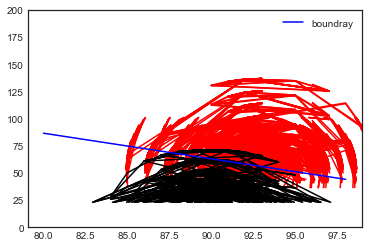

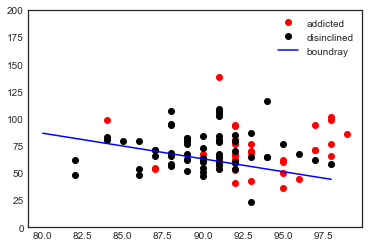

In [132]:
#work on 100 data
#F1 and F5

trainDatas = trainData.copy()
trainDatas.pop('selector')
trainDatas.pop('class')
trainDatas.pop('alkphos')
trainDatas.pop('sgpt')
trainDatas.pop('sgot')

mean_addicted , cov_addicted , prob_addicted , mean_disinclined , cov_disinclined , prob_disinclined , x_addictedDataList , x_disinclinedDataList = getMeanAndCov(100 , trainDatas)

mm = testData[['mcv' , 'gammagt']].values

calculated_data = np.zeros(shape=(len(mm)))

for i in range(len(mm)):
    test = mm[i]

# prob = prob_disinclined / prob_addicted

    calculate_classifier_value_addicted = calculate_classifier_value(test , mean_addicted , cov_addicted , prob_addicted)
    calculate_classifier_value__disinclined = calculate_classifier_value(test , mean_disinclined , cov_disinclined , prob_disinclined)
    
    if calculate_classifier_value_addicted - calculate_classifier_value__disinclined >= 0 :
        calculated_data[i] = 1
    else:
        calculated_data[i] = 2
        
counter = 0
for i in range(len(mm)):
    if testClassArray[i] != calculated_data[i]:
        counter = counter + 1
#         print('Test data with class: ', testClassArray[i],' predicted as class : ' , calculated_data[i] , counter)

accuracy = ((len(mm) - counter)/len(mm)) * 100

#contour plot

X, Y = np.meshgrid(z[: , 0],z[: , 1])
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mean_addicted[0], mean_addicted[1]], [[cov_addicted[0][0], 0], [0, cov_addicted[1][1]]])

X1, Y1 = np.meshgrid(x[: , 0],x[: , 1])
pos1 = np.empty(X1.shape + (2,))
pos1[:, :, 0] = X1; pos1[:, :, 1] = Y1
rv1 = multivariate_normal([mean_disinclined[0], mean_disinclined[1]], [[cov_disinclined[0][0], 0], [0, cov_disinclined[1][1]]])

plt.contour(X, Y, rv.pdf(pos), colors='red')
plt.contour(X1, Y1, rv1.pdf(pos1), colors='black')

point1 = [93.2, 55.4325]
point2 = [95.2, 50.720]

x_values = [point1[0], point2[0]]

y_values = [point1[1], point2[1]]

m = (point2[1] - point1[1])/(point2[0] - point1[0])

x0y = - (m * point2[0]) + point2[1]

newX = np.linspace(80,98,10)
newY = m*newX + x0y
plt.plot(newX, newY, '-b', label='boundray')
plt.ylim([0, 200])

plt.legend()

plt.show()


#2D and datas

plt.plot(z[: , 0],z[: , 1] , linestyle='', marker='o', color="red", label='addicted')
plt.plot(x[: , 0],x[: , 1] , linestyle='', marker='o', color="black", label='disinclined')

plt.plot(newX, newY, '-b', label='boundray')
plt.ylim([0, 200])

plt.legend()

plt.show()


In [ ]:
#Figure out Features 1 and 5 have best accuracy so calculate and plot decision boundary
#and add error cost 

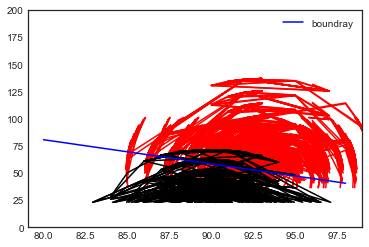

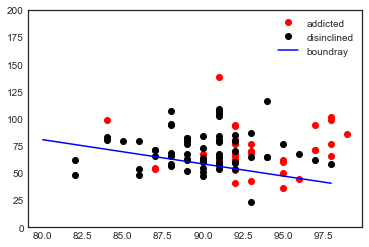

In [131]:
#work on 100 data
#F1 and F5

trainDatas = trainData.copy()
trainDatas.pop('selector')
trainDatas.pop('class')
trainDatas.pop('alkphos')
trainDatas.pop('sgpt')
trainDatas.pop('sgot')

mean_addicted , cov_addicted , prob_addicted , mean_disinclined , cov_disinclined , prob_disinclined , x_addictedDataList , x_disinclinedDataList = getMeanAndCov(100 , trainDatas)

mm = testData[['mcv' , 'gammagt']].values

calculated_data = np.zeros(shape=(len(mm)))

for i in range(len(mm)):
    test = mm[i]

# prob = prob_disinclined / prob_addicted

    calculate_classifier_value_addicted = calculate_classifier_value_with_error(test , mean_addicted , cov_addicted , prob_addicted , 3)
    calculate_classifier_value__disinclined = calculate_classifier_value_with_error(test , mean_disinclined , cov_disinclined , prob_disinclined , 2)
    
    if calculate_classifier_value_addicted - calculate_classifier_value__disinclined >= 0 :
        calculated_data[i] = 1
    else:
        calculated_data[i] = 2
        
counter = 0
for i in range(len(mm)):
    if testClassArray[i] != calculated_data[i]:
        counter = counter + 1
#         print('Test data with class: ', testClassArray[i],' predicted as class : ' , calculated_data[i] , counter)

accuracy = ((len(mm) - counter)/len(mm)) * 100

#contour plot

X, Y = np.meshgrid(z[: , 0],z[: , 1])
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mean_addicted[0], mean_addicted[1]], [[cov_addicted[0][0], 0], [0, cov_addicted[1][1]]])

X1, Y1 = np.meshgrid(x[: , 0],x[: , 1])
pos1 = np.empty(X1.shape + (2,))
pos1[:, :, 0] = X1; pos1[:, :, 1] = Y1
rv1 = multivariate_normal([mean_disinclined[0], mean_disinclined[1]], [[cov_disinclined[0][0], 0], [0, cov_disinclined[1][1]]])

plt.contour(X, Y, rv.pdf(pos), colors='red')
plt.contour(X1, Y1, rv1.pdf(pos1), colors='black')

point1 = [95.2, 46.754]
point2 = [97.5, 41.637]

x_values = [point1[0], point2[0]]

y_values = [point1[1], point2[1]]

m = (point2[1] - point1[1])/(point2[0] - point1[0])

x0y = - (m * point2[0]) + point2[1]

newX = np.linspace(80,98,10)
newY = m*newX + x0y
plt.plot(newX, newY, '-b', label='boundray')
plt.ylim([0, 200])

plt.legend()

plt.show()


#2D and datas

plt.plot(z[: , 0],z[: , 1] , linestyle='', marker='o', color="red", label='addicted')
plt.plot(x[: , 0],x[: , 1] , linestyle='', marker='o', color="black", label='disinclined')

plt.plot(newX, newY, '-b', label='boundray')
plt.ylim([0, 200])

plt.legend()

plt.show()
